# NLP Core 4 Exercise: Colorful Word Embeddings

In this exercise, we will deepen our knowledge of **word embedding vectors** by using them in practice to group hundreds of words based on their meanings.

## Part 1: Playing with word vectors

Let's first load a word embedding model with Gensim's downloader API:

In [1]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-200')

We can then access word embedding vectors with the following syntax:

In [2]:
model['house']

array([ 4.7641e-01, -5.6269e-04,  4.9202e-02, -7.3879e-01,  3.7132e-02,
       -1.2158e-01, -4.6408e-02,  2.3389e-01,  8.8552e-02,  2.3504e-01,
        4.9984e-01, -2.5752e-02,  8.6279e-01, -5.6084e-01, -1.5898e-02,
        3.8606e-01, -4.0744e-01, -7.8242e-02, -4.9744e-01,  2.3597e-01,
       -2.5095e-01,  2.5800e+00,  2.3732e-01, -1.3906e-01,  3.2639e-01,
       -3.9747e-01, -7.6958e-02, -2.7866e-01,  4.1035e-01,  2.3829e-01,
       -4.1175e-02, -6.7140e-01,  4.4805e-01,  1.9617e-01, -5.8027e-01,
        1.7948e-01, -9.3515e-02, -3.6991e-01,  8.2635e-01,  1.7027e-01,
       -1.0140e-01,  5.4630e-02, -1.8867e-01,  5.2122e-01, -1.5975e-01,
        1.3666e-01,  5.4290e-01,  1.9361e-01, -9.2103e-02,  5.6441e-01,
        1.4980e-02,  1.5426e-01,  4.4921e-01,  2.5681e-01, -3.7364e-02,
       -4.5421e-02,  1.8183e-01, -1.2785e-01, -2.4702e-01,  3.6216e-01,
        5.0130e-01,  2.7318e-01,  1.0898e-01, -2.7041e-01,  3.7572e-01,
       -7.0259e-01, -9.0682e-01, -1.8616e-01, -4.0091e-02,  4.05

**Questions**:
  1. What are the dimensions of the vectors returned by this model?
  2. What are the three words most similar to the word *gray* in the model? What are the three most similar words to *kitchen*? (Hint: use the function model.most_similar)
  3. What is an example of two words that are very dissimilar from one another in the model? (use the function model.similarity)

In [3]:
model['house'].shape

(200,)

In [4]:
model.most_similar(positive = ['cow', 'pork'], topn = 3)

[('beef', 0.7888671159744263),
 ('meat', 0.7689467668533325),
 ('chicken', 0.7129736542701721)]

We discussed in class how **word analogies** (e.g. king-queen=waiter-waitress) can be reflected by adding and subtracting word vectors. Consider the following code:

In [5]:
model.most_similar(positive = ['cow', 'pork'], negative = ['beef'], topn = 3)

[('pig', 0.6433343887329102),
 ('hog', 0.5722268223762512),
 ('pigs', 0.5682295560836792)]

**Questions:**
  4. What do you think the arguments *positive=* and *negative=* mean above? What kind of word analogy does this give us?
  5. Find another example of a word analogy using the most_similar function.

4. positive is the positive vectors we are adding in our word embedding equation while negative vectors are the ones we are subtracting. By subtracting word embeddings we are removing their inherent meaning from certain words to find the resulting words.

5.

In [6]:
model.most_similar(positive = ['king', 'woman'], negative = ['man'], topn = 3)

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569)]

## Part 2: Coloring Words

For this exercise, we will be analyzing the list of words in the attached file *mixed_words.txt*.

**Questions:**
  6. Look through the list of words. Do you see any patterns? What topics do you think are covered by these words?
  7. Load the words into a Python array. How many of the words are found in our word embedding model? What word(s) are missing?
  8. Make a matrix X whose rows are the word embedding vectors for each word in the model. (Hint: You can call model[ list ] for a list of words.) What are the dimensions of this matrix?
  9. Cluster the words by using sklearn.cluster.KMeans with n_clusters = 2, fitting it to the matrix X, and save the predicted labels in a variable called *labels*. What are some examples of words in each cluster?

6.

In [7]:
import pandas as pd

In [8]:
df = pd.read_fwf('mixed_words.txt', header=None, widths=[100000])

Looking at the file directly we can see some clearly distinct classes of words such as food, colors, math/physics terms, materials....

7.

In [9]:
def is_in_model(word):
    return word in model

In [10]:
df['is_in_model'] = df[0].apply(is_in_model)
print('{} is missing in our model'.format(df[0][df['is_in_model'] == 0].values[0]))
print('There are {} words in our model'.format(df.shape[0]-(df['is_in_model'] == 0).sum()))

kedgeree is missing in our model
There are 321 words in our model


8.

In [11]:
words_in_model = df[df['is_in_model'] == True]
X = model[words_in_model[0]]
X.shape

(321, 200)

9.

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)
labels = kmeans_model.labels_

In [26]:
import numpy as np

In [27]:
words_0_indices = np.argwhere(labels==0).flatten()
words_1_indices = np.argwhere(labels==1).flatten()
words_0 = words_in_model.iloc[words_0_indices,0]
words_1 = words_in_model.iloc[words_1_indices,0]

In [28]:
words_0

0        conjunction
1      individualism
5             thesis
7           precinct
14         synthesis
17                or
18            weaker
19           context
20           obverse
24      completeness
26         postulate
29              plod
30         extension
32              free
33           paradox
37       metaphysics
39         structure
40             tacit
41            denial
43     inconsistency
44             logic
49         attribute
53             solve
55             sound
58            member
63              snag
64             limit
65          argument
66            figure
68          stronger
           ...      
262            major
263       assumption
264             weak
265              nor
266         complete
267      predicament
268      affirmative
270      convertible
272            valid
274       conversion
276           sphere
277           circle
280              bay
281       consistent
284         analytic
285       consequent
292          

In [29]:
words_1

2          walnut
3           green
4          coffee
6        pemmican
8          sulfur
9            stew
10          tawny
11      dandelion
12            jam
13          grape
15           plum
16         orange
21          brass
22         tamale
23        mustard
25            oak
27           tofu
28          khaki
31          icing
34         cookie
35          sepia
36         medium
38       eggshell
42          mauve
45          coral
46           bone
47          ivory
48         russet
50        oatmeal
51       lavender
          ...    
269          blue
271      greenish
273      brownish
275       fuchsia
278         black
279           dun
282        banana
283         brown
286        collar
287       verdant
288         flour
289         ochre
290           tan
291        auburn
293         white
299         umber
300         crepe
302         lemon
303         fiery
304         sable
305        carrot
306      chestnut
307    mayonnaise
308        flaxen
309       

Now let's use PCA to project our data points onto two dimensions and visualize them. The colors displayed correspond to the k-means clusters:

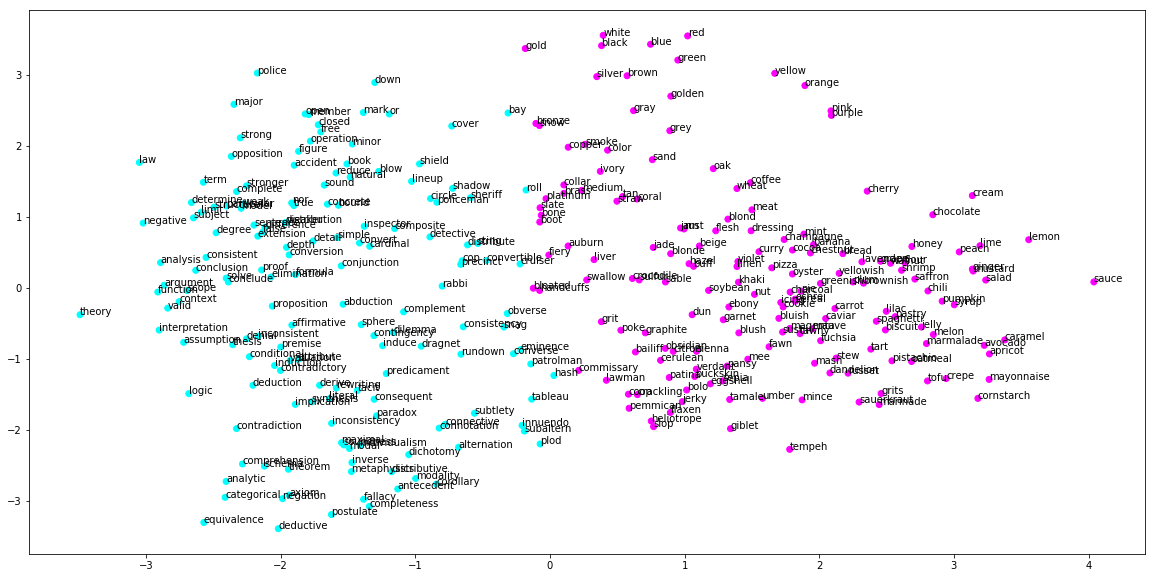

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(words_in_model[0]):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

**Question:**
  10. Try re-running this code with different numbers of k-means clusters. What do you think the right number of clusters should be? What do the clusters represent?

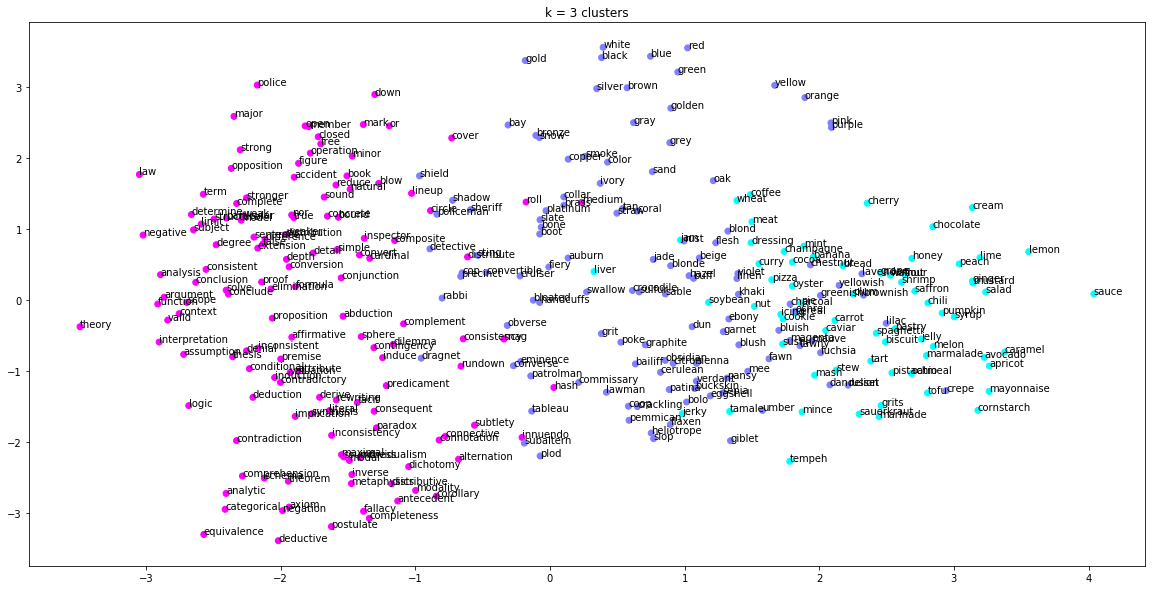

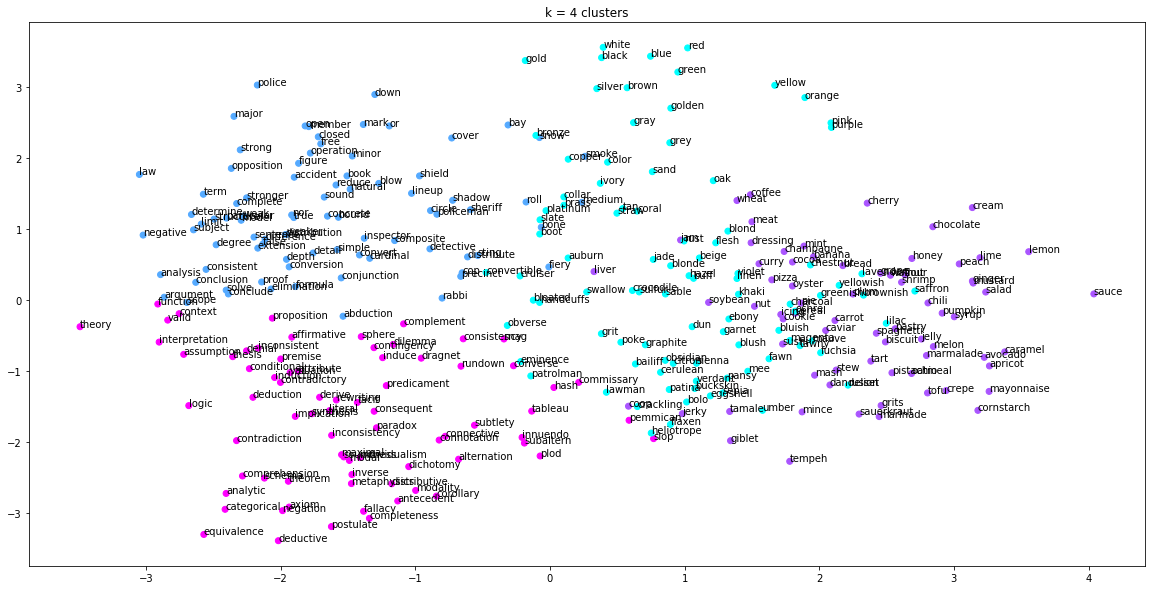

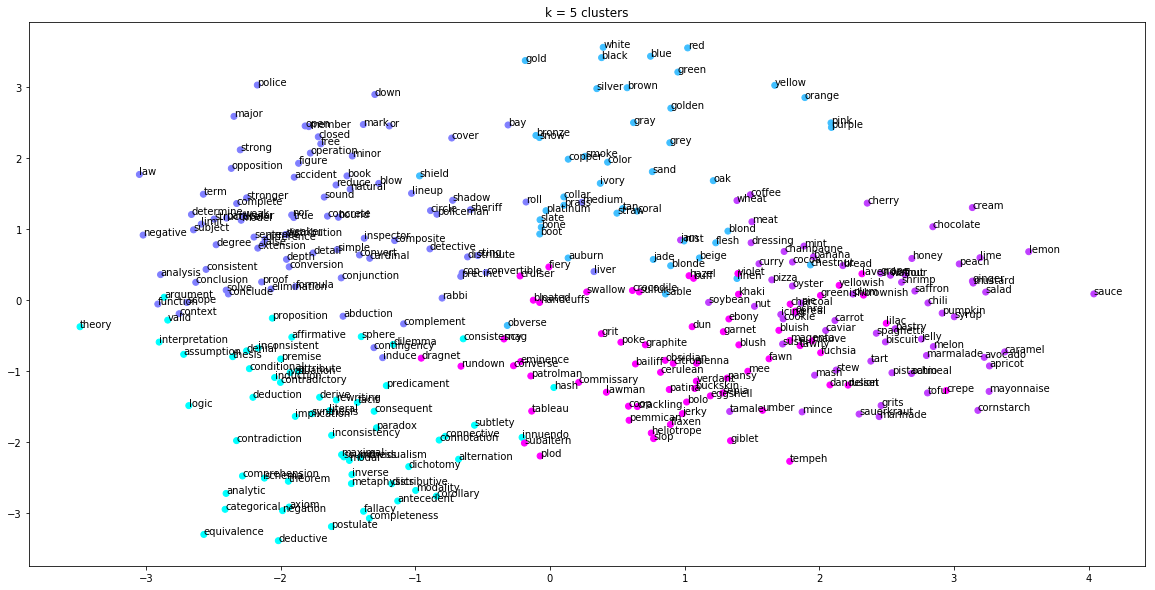

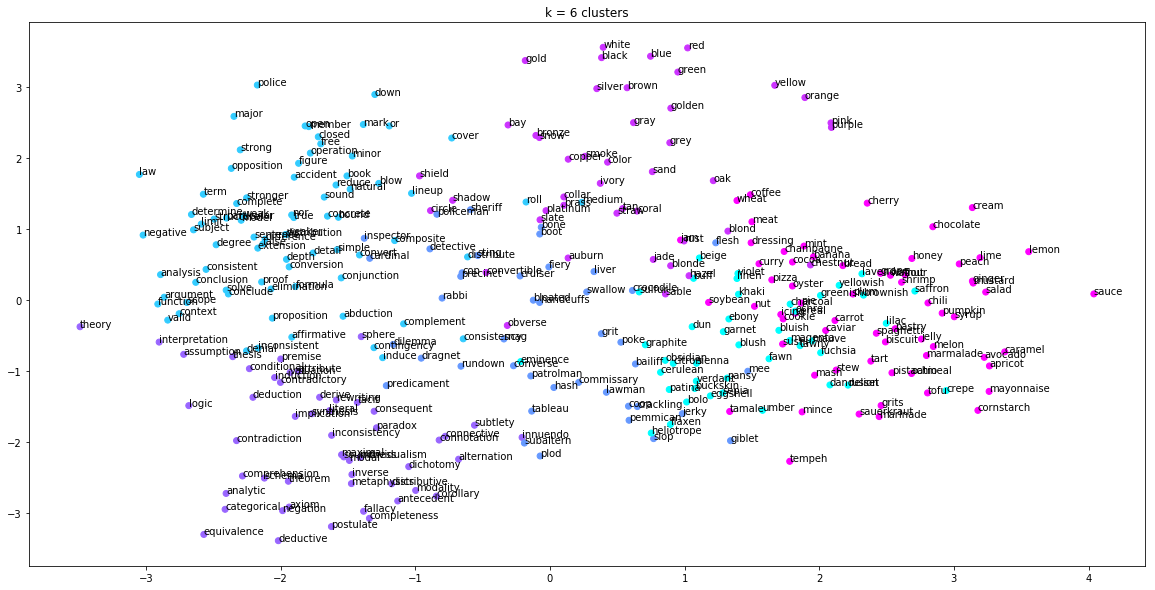

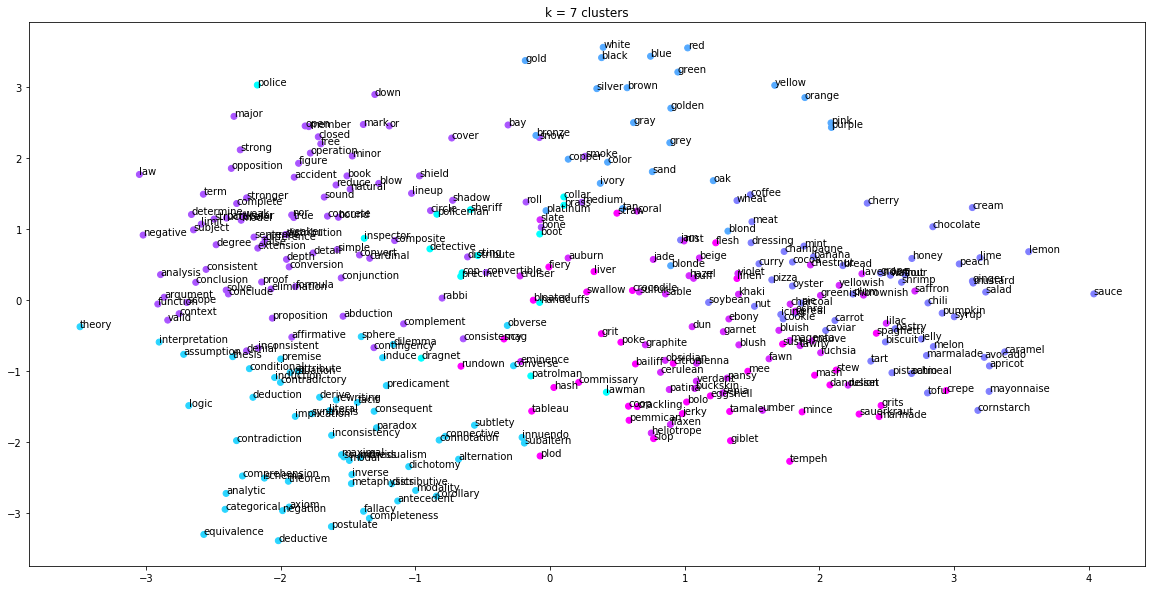

In [33]:
for k in range(3,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    words_cluster = np.zeros((3,))

    pca = PCA(n_components = 2)
    Y = pca.fit_transform(X)
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    ax.scatter(Y[:, 0], Y[:, 1], c = labels , cmap = pylab.cm.cool)
    ax.title.set_text('k = {} clusters'.format(k))
    for i, word in enumerate(words_in_model[0]):
        ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

Visually, we can see that for k=4 most of the words are best classified.
There classes can be clearly distinguished by the topics: food, colors, logic, law.
The pink one has all the logic related terms. The purple one has the food related terms. The light blue one has all the colors and the blue one has all the law related terms.